In [263]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Conv2D, MaxPool2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import time
%matplotlib inline

In [264]:
imagePaths = 'D:\\PROJECTS\\Data Science\\PROJECTS\\potato\\new dataset\\'
label_list = ['Early Blight', 'Healthy', 'Late Blight']
data = []
labels = []

In [265]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'\\*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        data.append(image)
        labels.append(label)

In [266]:
np.array(data).shape

(300, 128, 128, 3)

In [267]:
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [268]:
print(labels)

['Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early Blight' 'Early Blight' 'Early Blight'
 'Early Blight' 'Early B

In [269]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

# 1: Sirih
# 0: Seledri

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 

In [270]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [271]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (240, 128, 128, 3)
Ukuran data test = (60, 128, 128, 3)


In [272]:
# model = Sequential()
# # input Layer: 32 size x 32 size x 3 rgb pixels flattened
# model.add(Flatten(input_shape=(32, 32, 3)))   
# model.add(Dense(1024, activation="relu"))   # 1st hidden layer
# # model.add(Dense(512, activation="relu"))  # 2nd hidden layer
# model.add(Dense(218, activation="relu"))  # 2nd hidden layer
# model.add(Dense(3, activation="sigmoid"))  # output layer

In [273]:
model = Sequential([
 Conv2D(8, kernel_size=7, activation='relu',
 input_shape=(128,128,3),
 padding = 'same'),
 MaxPooling2D(pool_size=(2, 2), strides = 2),
 Conv2D(16, kernel_size=7, activation='relu', padding = 'same'),
 MaxPooling2D(pool_size=(2, 2), strides = 2),
 Conv2D(32, kernel_size=7, activation='relu', padding = 'same'),
 MaxPooling2D(pool_size=(2, 2), strides = 2),
 Conv2D(64, kernel_size=7, activation='relu', padding = 'same'),
 MaxPooling2D(pool_size=(2, 2), strides = 2),
 Flatten(),
 Dense(1024, activation='relu'),
 Dense(512, activation='relu'),
 Dropout(0.2),
 Dense(3, activation='softmax')
])

In [274]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 128, 128, 8)       1184      
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 64, 64, 16)        6288      
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_63 (Conv2D)          (None, 32, 32, 32)        25120     
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 16, 16, 32)     

In [275]:
# hyperparameter setting
lr = 0.001
max_epochs = 20
opt_funct = Adam(learning_rate=lr)

In [276]:
model.compile(loss = 'categorical_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

In [277]:
times = time.time()
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)
print("Time taken: {:.1f} seconds".format(time.time() - times))

Epoch 1/20
8/8 [==============================] - 4s 439ms/step - loss: 1.1010 - accuracy: 0.3167 - val_loss: 1.0793 - val_accuracy: 0.3333
Epoch 2/20
8/8 [==============================] - 3s 414ms/step - loss: 1.0796 - accuracy: 0.4167 - val_loss: 0.9996 - val_accuracy: 0.3000
Epoch 3/20
8/8 [==============================] - 3s 408ms/step - loss: 0.8586 - accuracy: 0.5667 - val_loss: 0.7597 - val_accuracy: 0.7000
Epoch 4/20
8/8 [==============================] - 3s 410ms/step - loss: 0.6996 - accuracy: 0.6875 - val_loss: 0.7140 - val_accuracy: 0.6167
Epoch 5/20
8/8 [==============================] - 4s 448ms/step - loss: 0.8573 - accuracy: 0.5500 - val_loss: 0.8889 - val_accuracy: 0.5833
Epoch 6/20
8/8 [==============================] - 4s 475ms/step - loss: 0.8430 - accuracy: 0.5583 - val_loss: 0.6954 - val_accuracy: 0.6667
Epoch 7/20
8/8 [==============================] - 4s 483ms/step - loss: 0.6888 - accuracy: 0.6625 - val_loss: 0.6689 - val_accuracy: 0.7167
Epoch 8/20
8/8 [====

In [278]:
# check acccuracy model for data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

Early Blight       0.90      0.86      0.88        22
     Healthy       0.72      0.81      0.76        16
 Late Blight       0.75      0.68      0.71        22

   micro avg       0.80      0.78      0.79        60
   macro avg       0.79      0.79      0.79        60
weighted avg       0.80      0.78      0.79        60
 samples avg       0.78      0.78      0.78        60



C:\Users\ASUSTU~1\AppData\Local\Temp/ipykernel_30428/3339995310.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = (predictions > 0.5).astype(np.int)
C:\Users\ASUS TUF GAMING\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


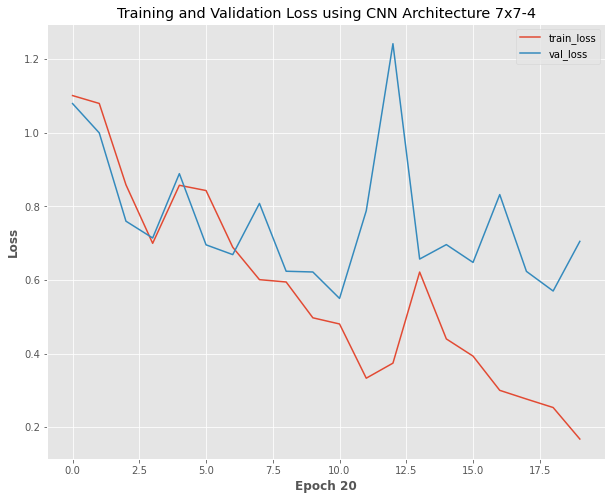

In [279]:
# Plot Training and Validation Loss

N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training and Validation Loss using CNN Architecture 7x7-4")
plt.xlabel("Epoch 20", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

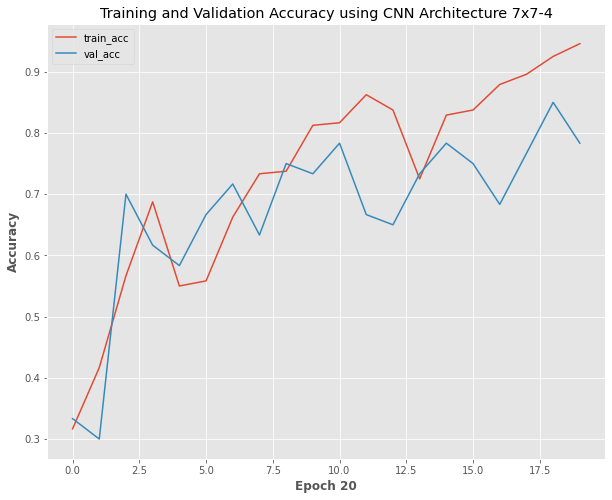

In [280]:
# Plot Training and Validation Accuracy

N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy using CNN Architecture 7x7-4")
plt.xlabel("Epoch 20", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()